In [41]:
import sys
sys.path.append('../scripts')  
import data_analysis as da
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:

# Load data
path = '../data/MachineLearningRating_v3.txt'
df = da.load_data(path)


c:\Users\Tsebaot\Desktop\week 3\Insurance-analytics\notebook\../scripts\data_analysis.py:11: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')


File successfully converted and saved as ../data/MachineLearningRating_v3.csv


In [43]:
# Perform EDA
print(da.descriptive_stats(df))


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [14]:
# List of columns to check
columns_to_check = ['Province', 'CoverType', 'VehicleType', 'Gender', 
                    'MaritalStatus', 'Bank', 'AccountType', 'Title', 'Language']

# Get the number of unique values in each specified column
unique_values_count = df[columns_to_check].nunique()

# Print the result
print(unique_values_count)


Province          9
CoverType        22
VehicleType       5
Gender            3
MaritalStatus     3
Bank             11
AccountType       3
Title             5
Language          1
dtype: int64


In [18]:
print(df['VehicleIntroDate'].head(10))
print(df['VehicleIntroDate'].unique())


0   2002-06-01
1   2002-06-01
2   2002-06-01
3   2002-06-01
4   2002-06-01
5   2002-06-01
6   2002-06-01
7   2002-06-01
8   2002-06-01
9   2002-06-01
Name: VehicleIntroDate, dtype: datetime64[ns]
<DatetimeArray>
['2002-06-01 00:00:00', '2004-03-01 00:00:00', '2003-02-01 00:00:00',
 '2005-06-01 00:00:00', '2008-11-01 00:00:00', '2010-11-01 00:00:00',
 '2008-08-01 00:00:00', '2004-05-01 00:00:00', '2006-02-01 00:00:00',
 '2005-08-01 00:00:00',
 ...
 '2009-06-01 00:00:00', '1993-02-01 00:00:00', '2011-01-01 00:00:00',
 '1987-02-01 00:00:00', '1992-01-01 00:00:00', '1987-04-01 00:00:00',
 '1992-05-01 00:00:00', '2003-03-01 00:00:00', '1994-03-01 00:00:00',
 '1995-08-01 00:00:00']
Length: 161, dtype: datetime64[ns]


In [19]:
print(df['VehicleIntroDate'].isna().sum())


552


In [20]:
print(df[df['VehicleIntroDate'].isna()])


        UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
487033                74751      3844       2015-02-01            False   
512140                74753      3844       2014-10-01            False   
512141                74753      3844       2014-12-01            False   
512142                74753      3844       2015-03-01            False   
512143                74753      3844       2015-05-01            False   
...                     ...       ...              ...              ...   
936561               110736      7257       2015-02-01            False   
936562               110734      7257       2015-02-01            False   
936563               110746      7258       2015-02-01            False   
936564               131737      7258       2015-02-01            False   
936565               110755      7258       2015-07-01            False   

       Citizenship        LegalType Title Language       Bank  \
487033                   Individua

In [45]:
df['VehicleIntroDateMissing'] = df['VehicleIntroDate'].isna()


In [46]:
# Convert to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')

# Convert to categorical
categorical_cols = [
    'Province', 'CoverType', 'VehicleType', 'Gender', 
    'MaritalStatus', 'Bank', 'AccountType', 'Title', 'Language'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert float columns to integers if appropriate
df['NumberOfDoors'] = df['NumberOfDoors'].fillna(0).astype(int)


C:\Users\Tsebaot\AppData\Local\Temp\ipykernel_11880\3652152312.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  category      
 7   Language                  1000098 non-null  category      
 8   Bank                      854137 non-null   category      
 9   AccountType               959866 non-null   category      
 10  MaritalStatus             991839 non-null   category      
 11  Gender                    990562 non-null   catego

In [24]:

print(da.check_missing_values(df))


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [47]:
# Handling missing values for categorical columns
categorical_cols = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make', 'Model', 'Cylinders', 
                    'bodytype']  # Ensure you add categorical columns here
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Handling missing values for numeric columns
numeric_cols = ['CustomValueEstimate', 'mmcode', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'VehicleIntroDate']
for col in numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Handling missing values for date columns
median_date = df['VehicleIntroDate'].median()
df['VehicleIntroDate'] = df['VehicleIntroDate'].fillna(median_date)

# Handling missing values for 'CrossBorder' and related columns
df['CrossBorder'] = df['CrossBorder'].fillna('No')
df['NewVehicle'] = df['NewVehicle'].fillna('No')
df['WrittenOff'] = df['WrittenOff'].fillna('No')
df['Rebuilt'] = df['Rebuilt'].fillna('No')
df['Converted'] = df['Converted'].fillna('No')

# Dropping column with all missing values
df.drop(columns=['NumberOfVehiclesInFleet'], inplace=True)

# Create missing value flags for selected columns
df['Bank_missing'] = df['Bank'].isna().astype(int)
df['AccountType_missing'] = df['AccountType'].isna().astype(int)

# Check after imputation
print(df.isna().sum())


UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          2
NewVehicle

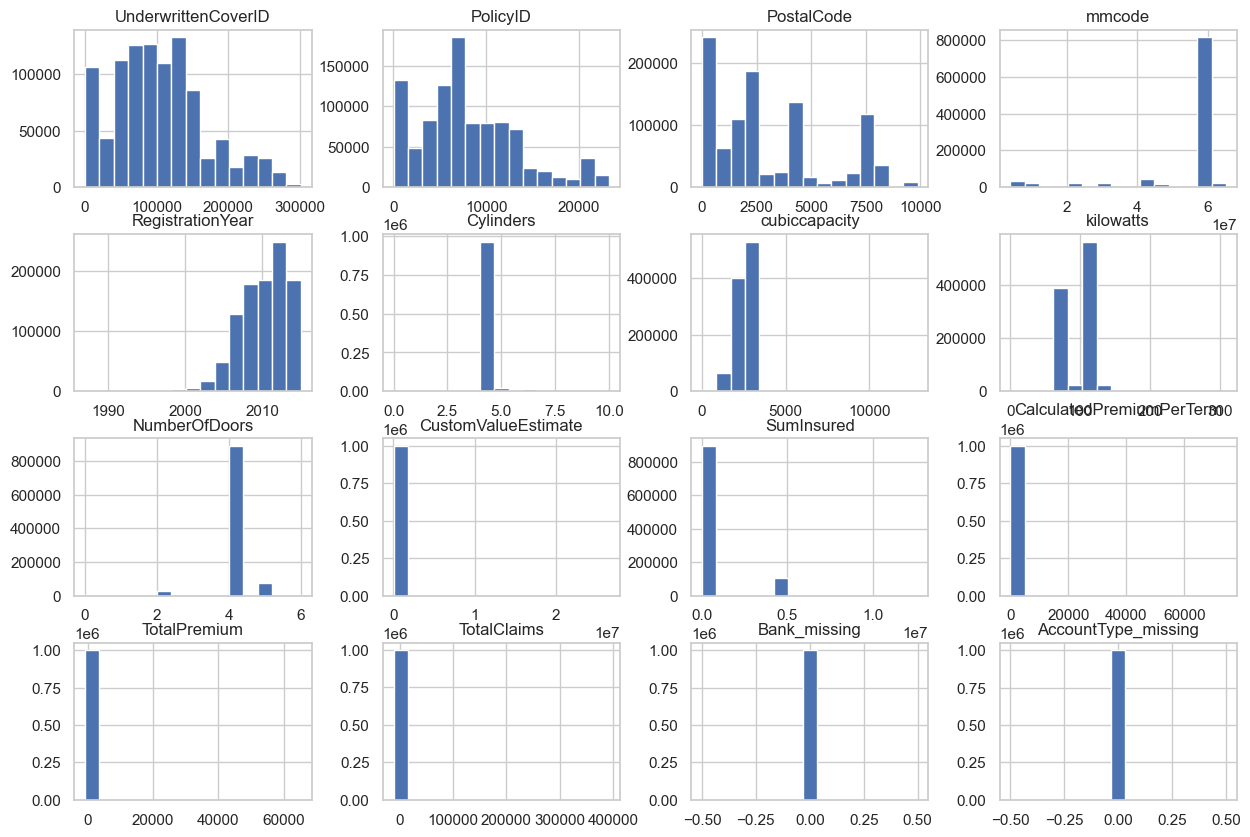

In [69]:
da.plot_histograms(df)

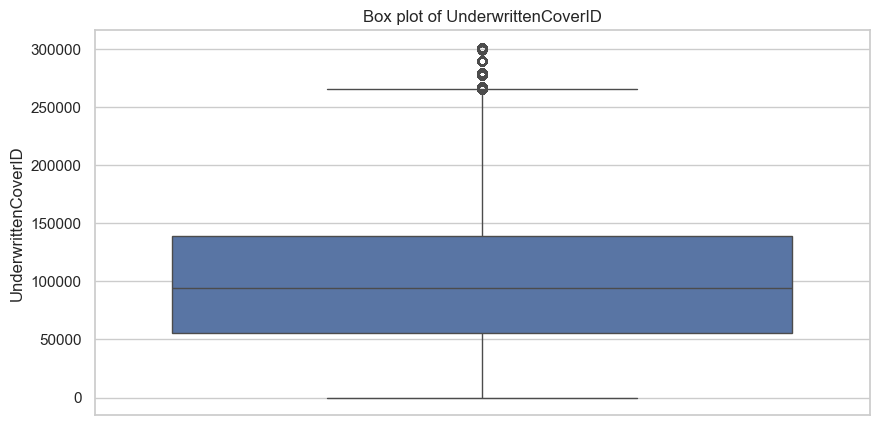

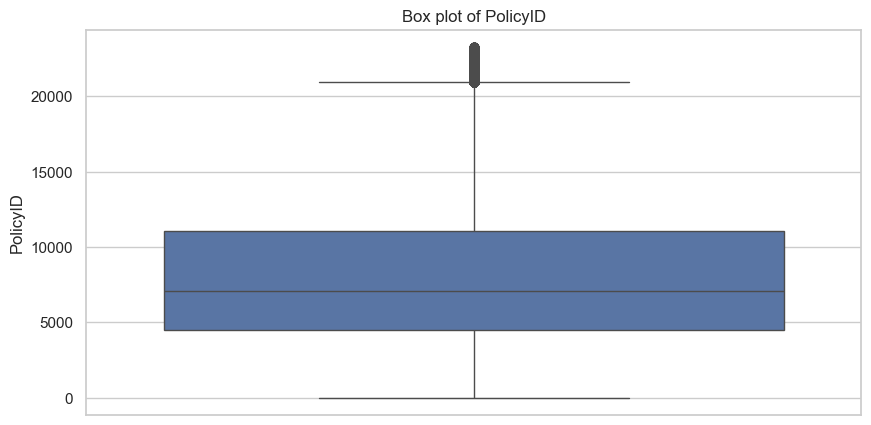

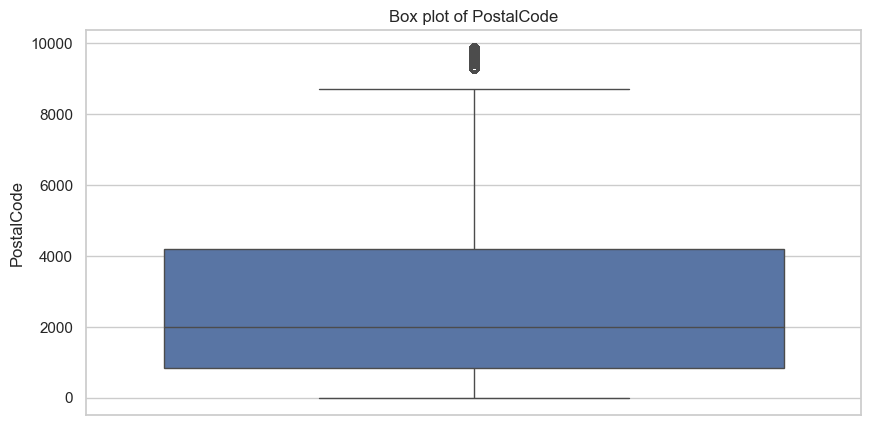

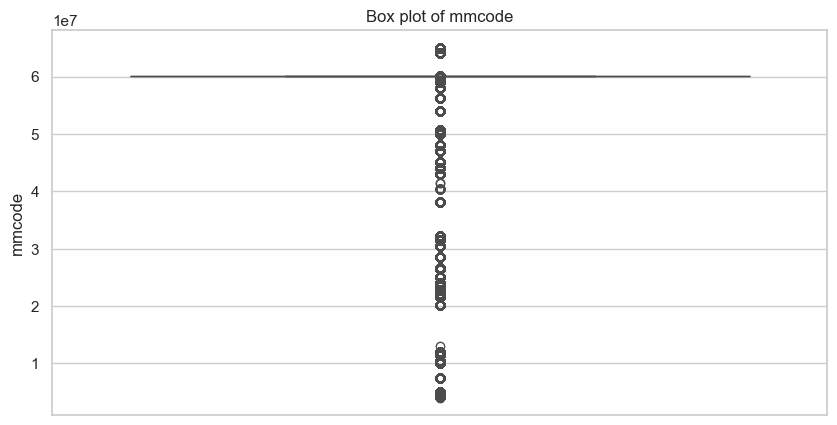

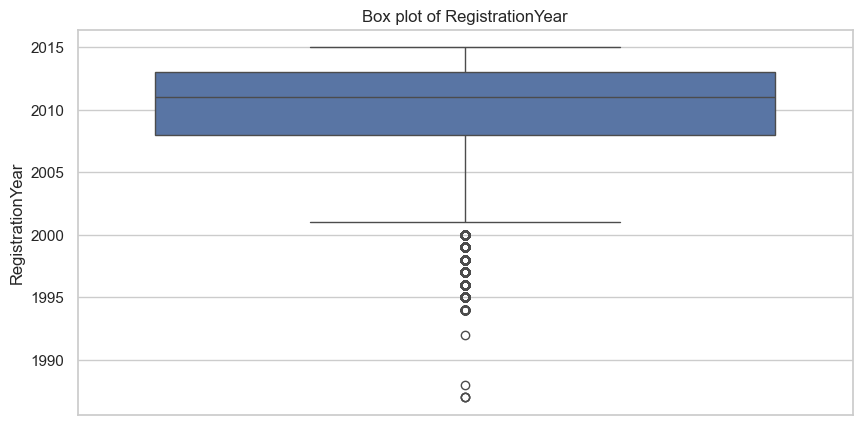

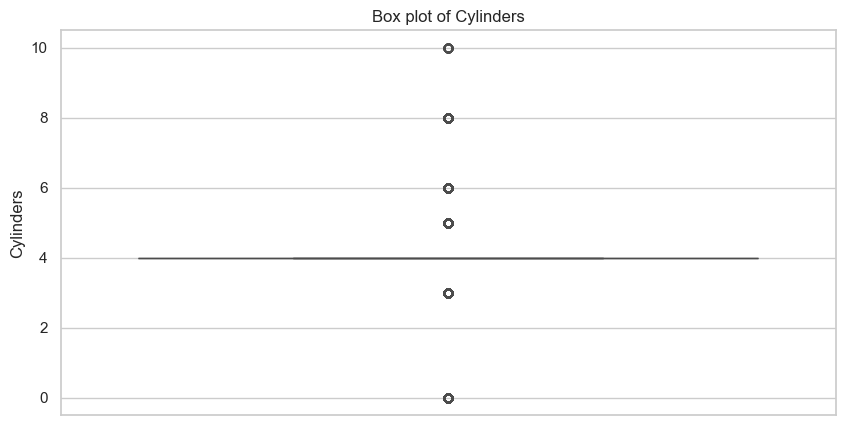

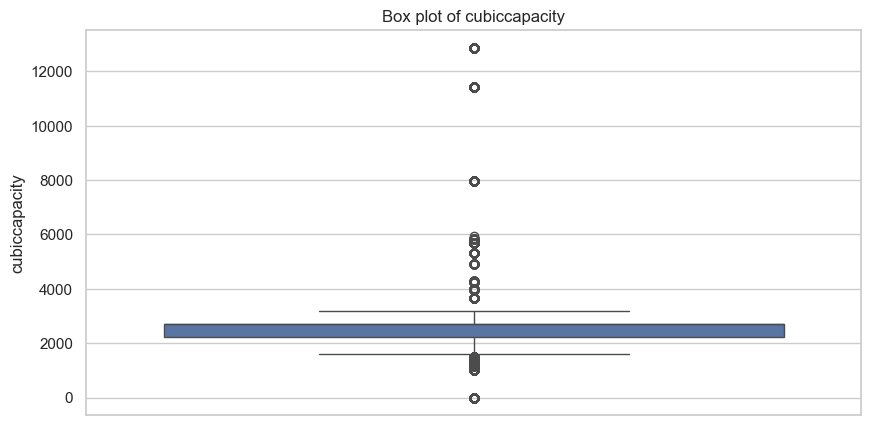

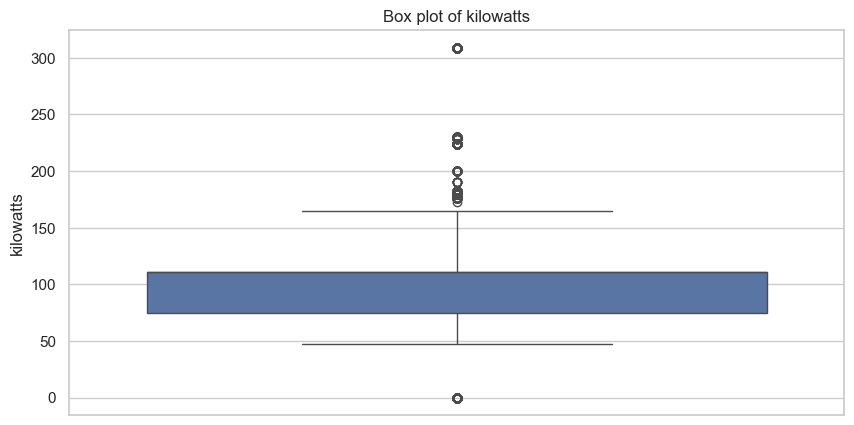

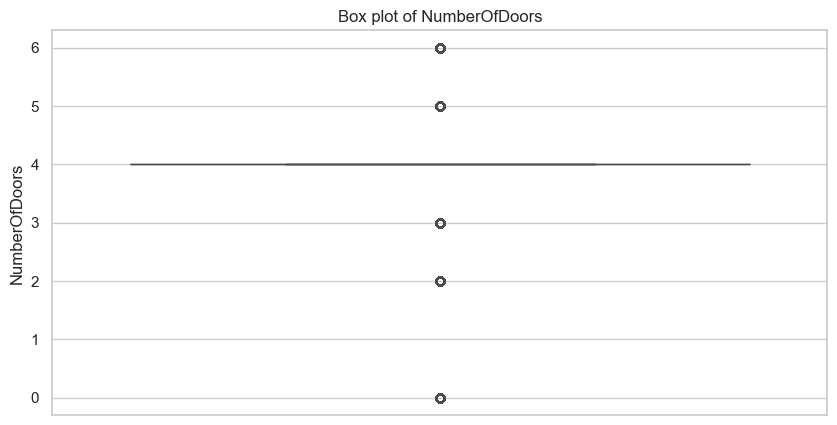

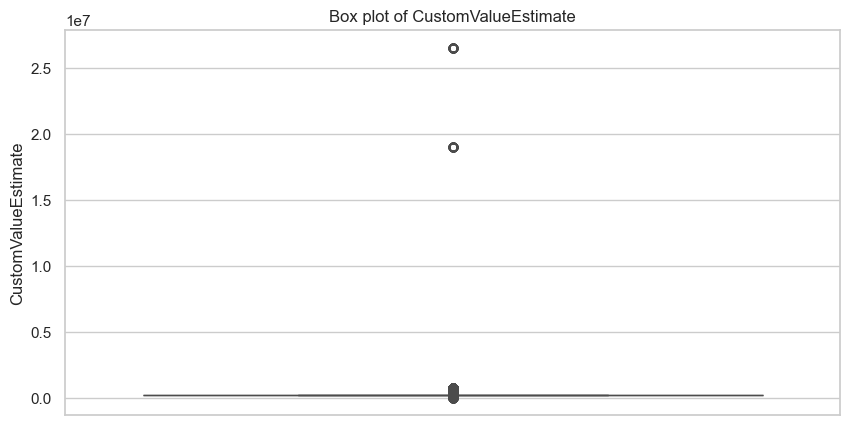

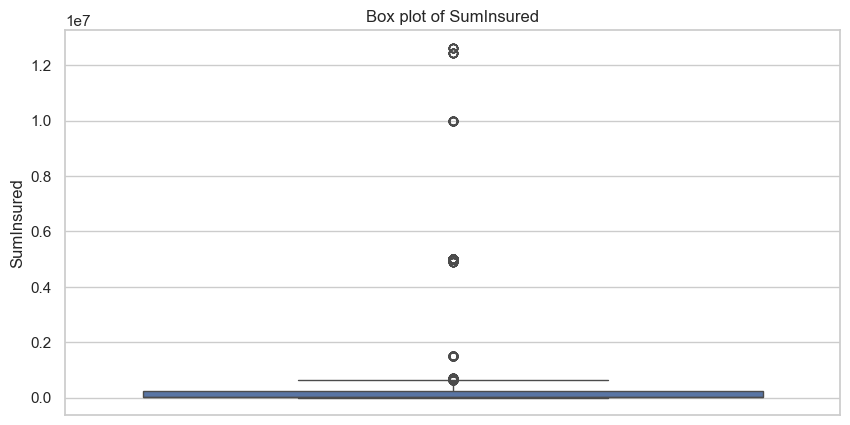

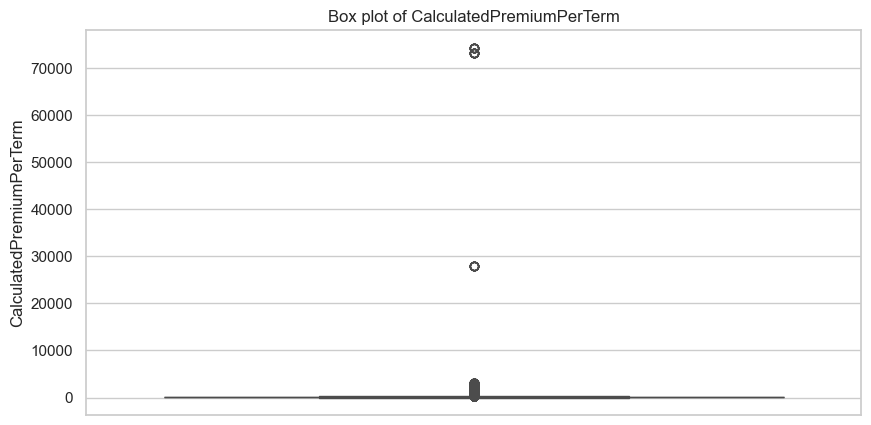

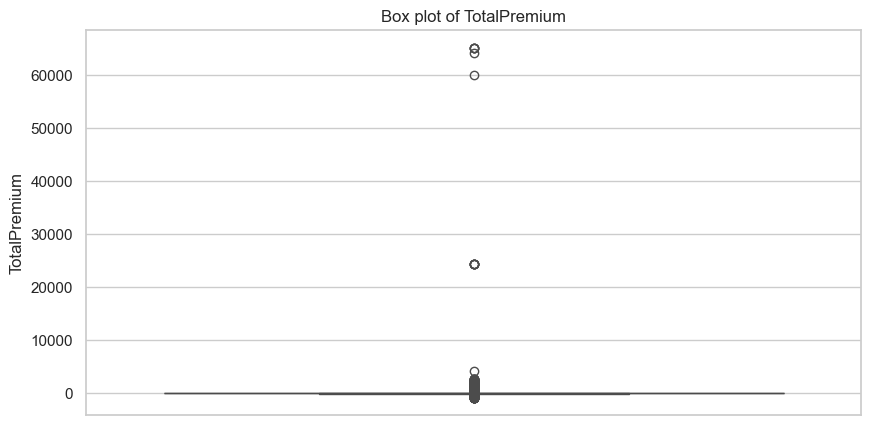

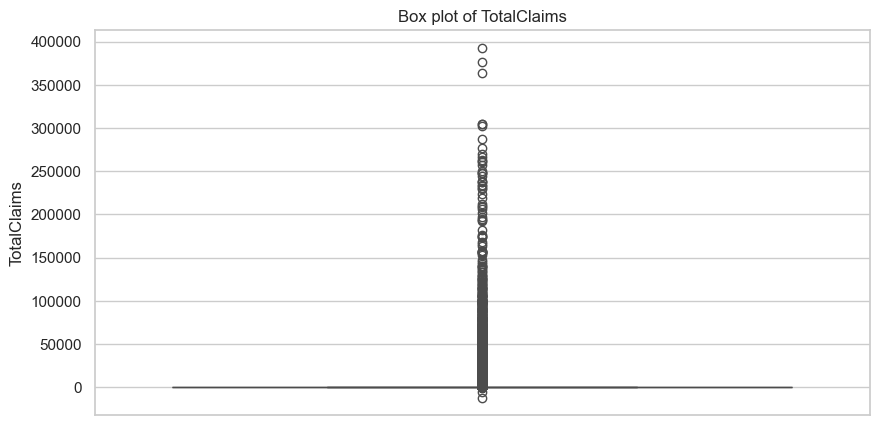

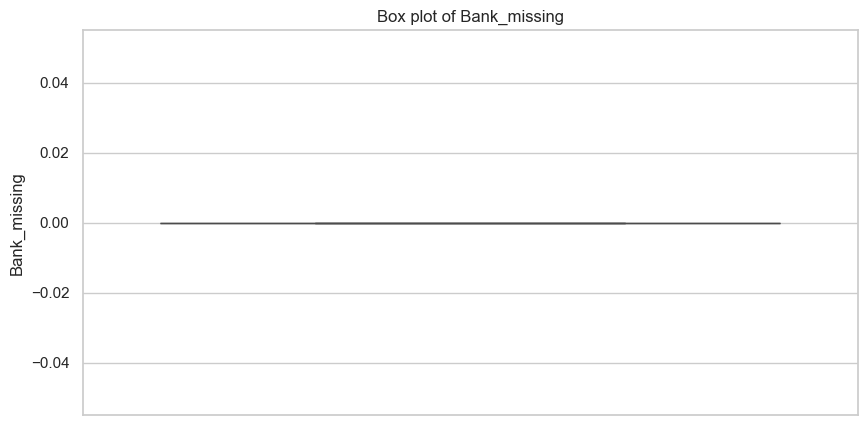

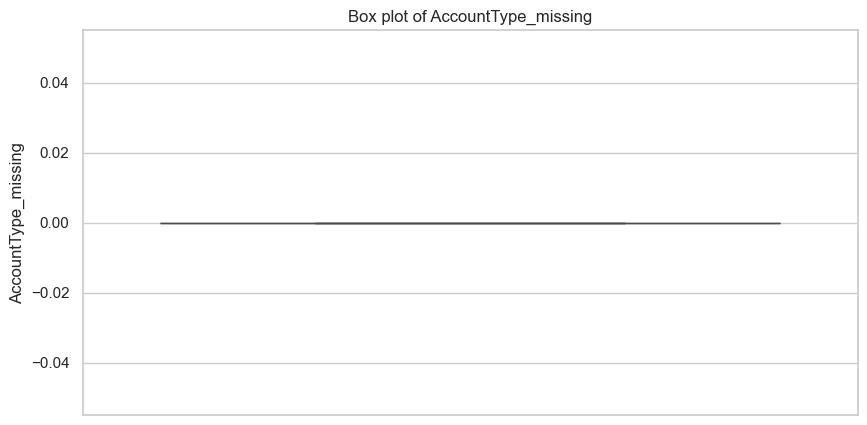

In [70]:
da.plot_boxplots(df)

Columns in DataFrame:
Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims',
       'VehicleIntroDateMissing', 'Bank_missing', 'AccountType_missing'],
      dtype='object')


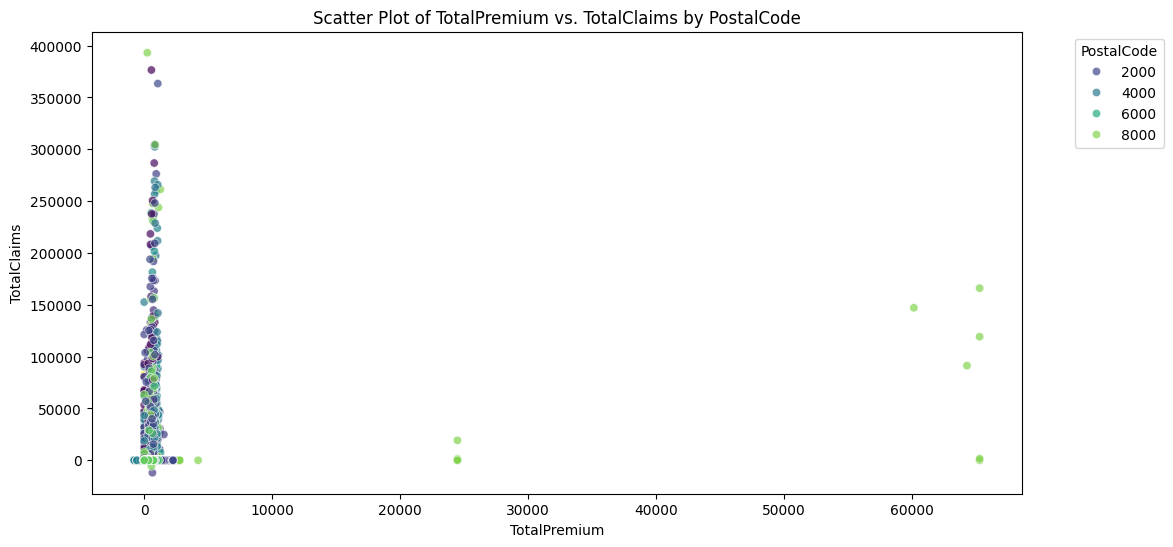


Correlation Matrix:
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


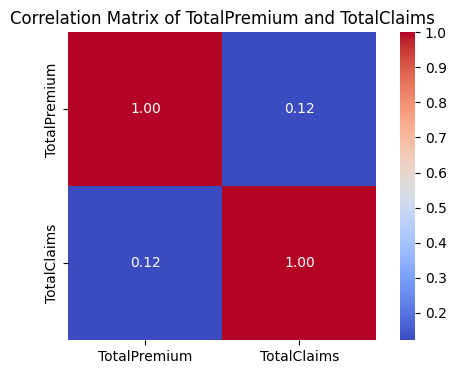


Average TotalPremium and TotalClaims by PostalCode:
     PostalCode  TotalPremium  TotalClaims
0             1     51.120638    57.589092
1             2     40.901700    41.589582
2             4    113.947737     0.000000
3             5     61.653626   207.378816
4             6     50.591432    19.610447
..          ...           ...          ...
883        9781     54.553324   139.499604
884        9830    131.760895     0.000000
885        9868    116.042377     0.000000
886        9869     44.774438     1.580807
887        9870     80.469292     0.000000

[888 rows x 3 columns]


In [48]:
# Check if data was loaded successfully
if df is not None:
    # Print column names to check for 'PostalCode'
    print("Columns in DataFrame:")
    print(df.columns)

    # Check if 'PostalCode' is in the DataFrame
    if 'PostalCode' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
        # 1. Scatter Plot of TotalPremium vs. TotalClaims
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis', alpha=0.7)
        plt.title('Scatter Plot of TotalPremium vs. TotalClaims by PostalCode')
        plt.xlabel('TotalPremium')
        plt.ylabel('TotalClaims')
        plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

        # 2. Correlation Matrix
        correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
        print("\nCorrelation Matrix:")
        print(correlation_matrix)

        # Plotting the correlation matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
        plt.title('Correlation Matrix of TotalPremium and TotalClaims')
        plt.show()

        # 3. Grouping by PostalCode and calculating average TotalPremium and TotalClaims
        postal_code_analysis = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean().reset_index()
        print("\nAverage TotalPremium and TotalClaims by PostalCode:")
        print(postal_code_analysis)
    else:
        print("Error: One or more required columns ('PostalCode', 'TotalPremium', 'TotalClaims') are missing from the DataFrame.")

In [53]:
# Check if data was loaded successfully
if df is not None:
    # 1. Grouping by Province and Cover Type
    cover_type_analysis = df.groupby(['Province', 'CoverType'], observed=True)[['TotalPremium', 'TotalClaims']].mean().reset_index()
    print("Average TotalPremium and TotalClaims by Province and Cover Type:")
    print(cover_type_analysis)


Average TotalPremium and TotalClaims by Province and Cover Type:
         Province                                CoverType  TotalPremium  \
0    Eastern Cape                         Accidental Death     27.202256   
1    Eastern Cape                    Asset Value Preserver     47.877759   
2    Eastern Cape                          Baggage/Luggage     11.101193   
3    Eastern Cape                      Basic Excess Waiver     46.610732   
4    Eastern Cape  Cleaning and Removal of Accident Debris      3.609455   
..            ...                                      ...           ...   
154  Western Cape                Signage and Vehicle Wraps      1.001131   
155  Western Cape           Standalone passenger liability     39.783475   
156  Western Cape                              Third Party    116.755869   
157  Western Cape                                  Trailer      6.607055   
158  Western Cape                               Windscreen     10.835787   

     TotalClaims  
0  

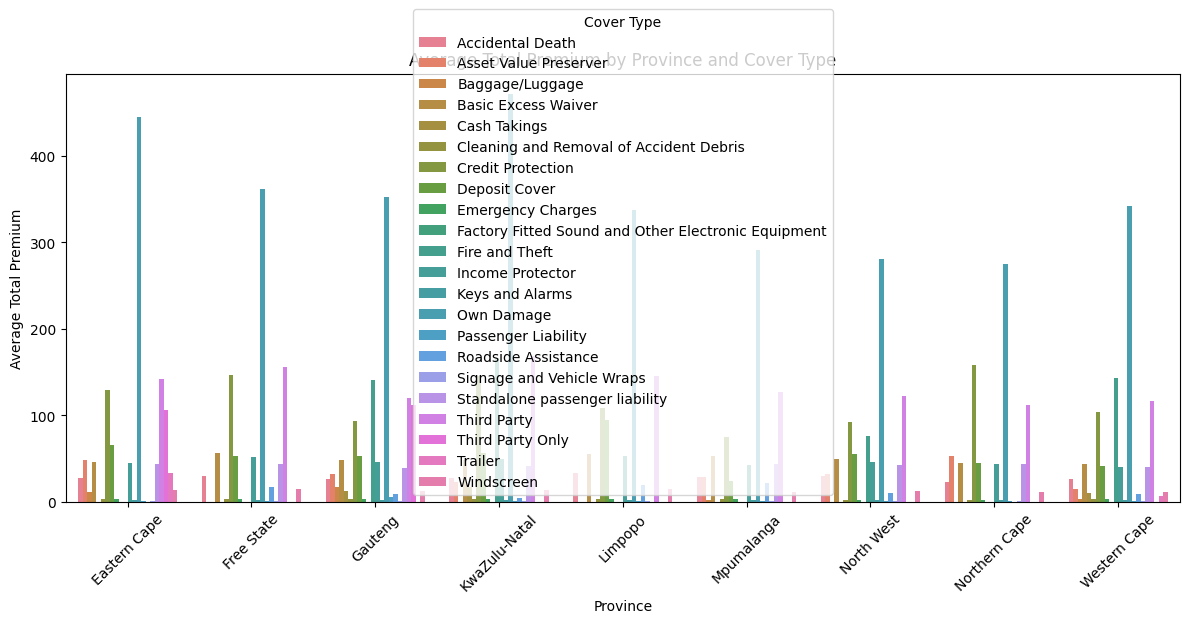

In [54]:
# Plotting Cover Type Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=cover_type_analysis, x='Province', y='TotalPremium', hue='CoverType', errorbar=None)
plt.title('Average Total Premium by Province and Cover Type')
plt.xlabel('Province')
plt.ylabel('Average Total Premium')
plt.legend(title='Cover Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
# 2. Grouping by Auto Make
auto_make_analysis = df.groupby(['make'], observed=True)[['TotalPremium', 'TotalClaims']].mean().reset_index()
print("\nAverage TotalPremium and TotalClaims by Auto Make:")
print(auto_make_analysis)



Average TotalPremium and TotalClaims by Auto Make:
                                   make  TotalPremium  TotalClaims
0                                  AUDI     50.799827   137.843083
1                                 B.A.W     76.872229   132.934016
2                                   BMW     45.658312    90.558050
3                                 C.A.M     37.571153    43.021964
4   CHERY                                   47.384840     0.000000
5                             CHEVROLET     32.873440     9.015870
6   CITROEN                                 29.902841     0.000000
7                                   CMC     44.277007    61.210485
8                              DAIHATSU     43.859649     0.000000
9                                  FIAT    106.317863   108.625642
10                                 FORD     49.429381     4.778627
11  FORD                                    36.428579     0.000000
12                                FOTON     41.283083     3.488588
13  GEELY 

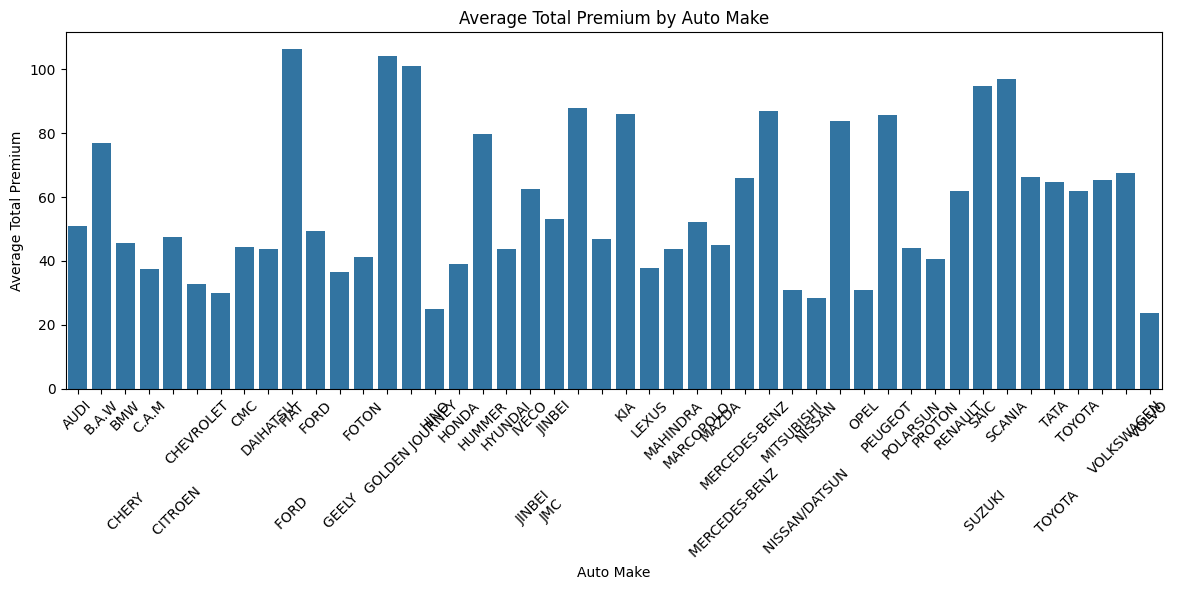

In [56]:

# Plotting Auto Make Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=auto_make_analysis, x='make', y='TotalPremium', errorbar=None)
plt.title('Average Total Premium by Auto Make')
plt.xlabel('Auto Make')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Checking for missing values in 'YearMonth', 'TotalPremium', and 'TotalClaims':
YearMonth       0
TotalPremium    0
TotalClaims     0
dtype: int64

Inspecting time_trend_analysis DataFrame:
YearMonth       datetime64[ns]
TotalPremium           float64
TotalClaims            float64
dtype: object
   YearMonth  TotalPremium  TotalClaims
0 2013-10-01      8.245856     0.000000
1 2013-11-01     17.815608    42.295217
2 2013-12-01     28.417892     6.209623
3 2014-01-01     29.603282     6.807258
4 2014-02-01     29.480328    30.547676

Checking for non-numeric values in TotalPremium and TotalClaims:
Empty DataFrame
Columns: [YearMonth, TotalPremium, TotalClaims]
Index: []
Empty DataFrame
Columns: [YearMonth, TotalPremium, TotalClaims]
Index: []


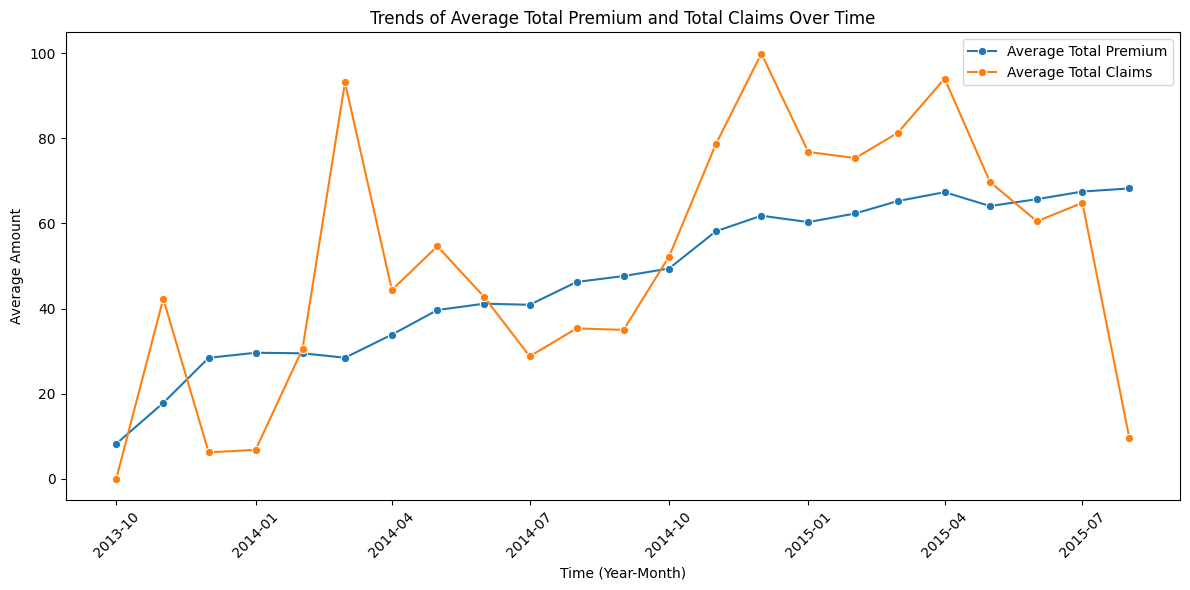

In [58]:
if 'TransactionMonth' in df.columns:
        df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')  # Convert to datetime
        df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')

        # Check for missing values
        print("\nChecking for missing values in 'YearMonth', 'TotalPremium', and 'TotalClaims':")
        missing_values = df[['YearMonth', 'TotalPremium', 'TotalClaims']].isnull().sum()
        print(missing_values)

        # Drop rows with NaN values in key columns
        df = df.dropna(subset=['YearMonth', 'TotalPremium', 'TotalClaims'])

        # Ensure numeric types
        df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
        df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')

        # Group by YearMonth
        time_trend_analysis = df.groupby(['YearMonth'], observed=True)[['TotalPremium', 'TotalClaims']].mean().reset_index()

        # Convert YearMonth to datetime
        time_trend_analysis['YearMonth'] = time_trend_analysis['YearMonth'].dt.to_timestamp()

        # Inspect the result
        print("\nInspecting time_trend_analysis DataFrame:")
        print(time_trend_analysis.dtypes)  # Check data types
        print(time_trend_analysis.head())   # Display the first few rows

        # Check for non-numeric values in TotalPremium and TotalClaims after grouping
        print("\nChecking for non-numeric values in TotalPremium and TotalClaims:")
        print(time_trend_analysis[time_trend_analysis['TotalPremium'].apply(lambda x: not isinstance(x, (int, float)))])
        print(time_trend_analysis[time_trend_analysis['TotalClaims'].apply(lambda x: not isinstance(x, (int, float)))])

        # Plotting Trends Over Time
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_trend_analysis, x='YearMonth', y='TotalPremium', label='Average Total Premium', marker='o')
        sns.lineplot(data=time_trend_analysis, x='YearMonth', y='TotalClaims', label='Average Total Claims', marker='o')
        plt.title('Trends of Average Total Premium and Total Claims Over Time')
        plt.xlabel('Time (Year-Month)')
        plt.ylabel('Average Amount')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...              Section                          Product  \
0  Current account  ...  Motor Comprehensive  Mobility Metered Ta

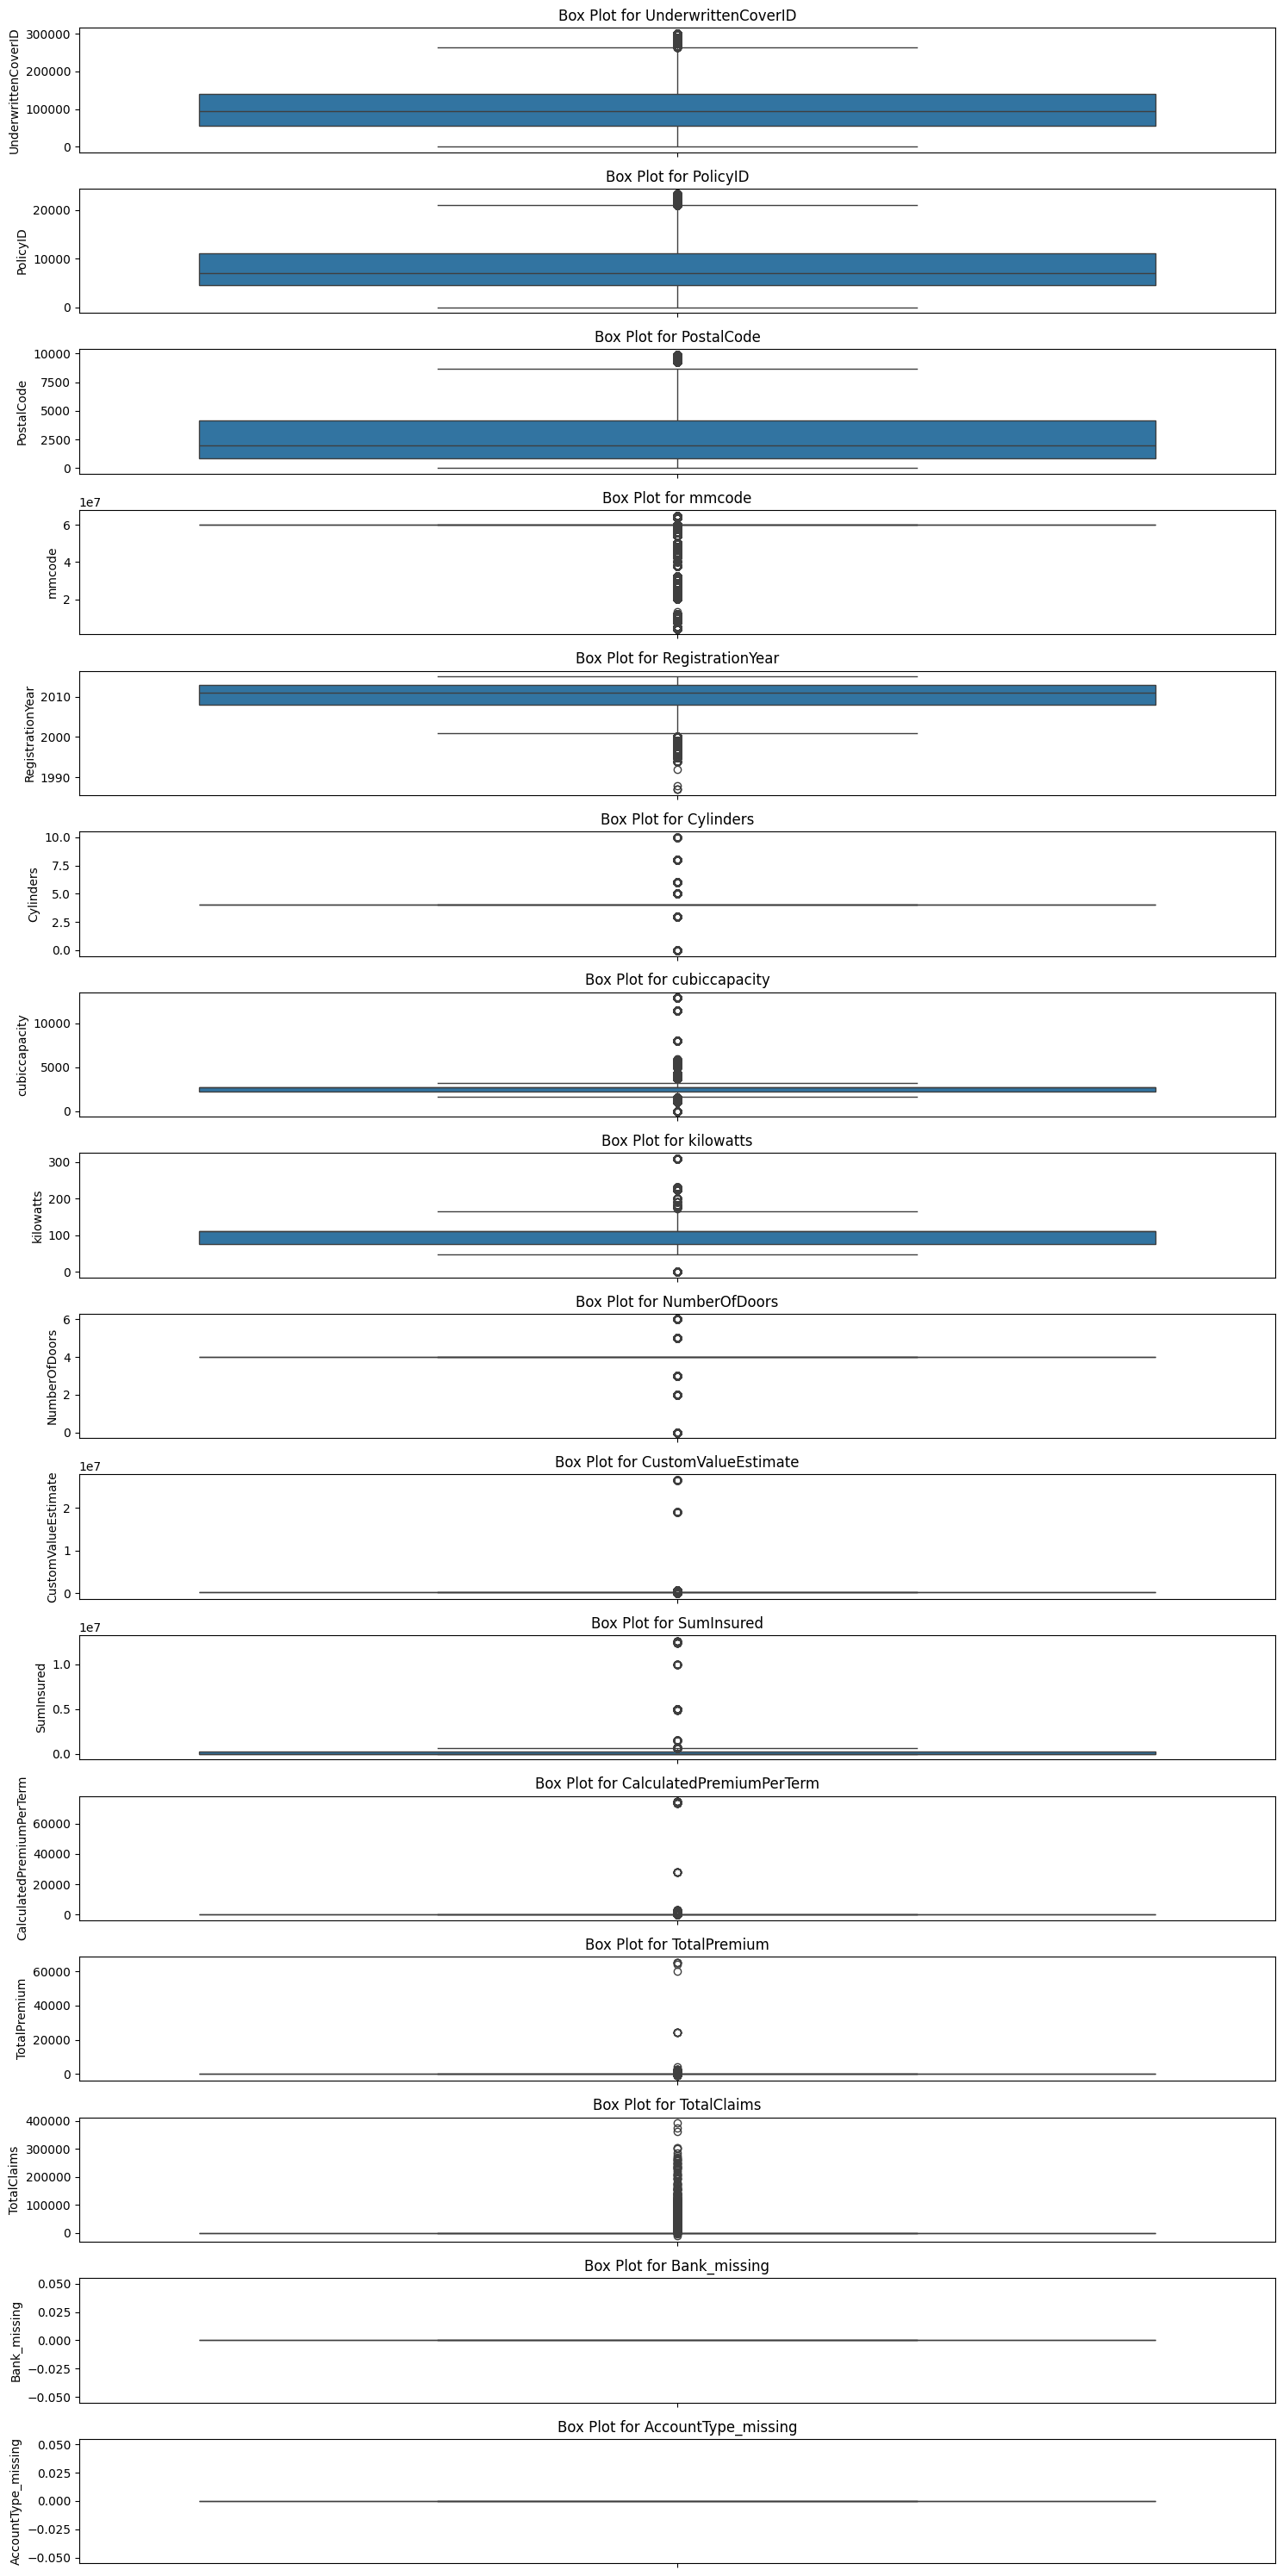

In [62]:
# Display the first few rows of the DataFrame
print(df.head())

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 30))

# Create box plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)  # Create subplots
    sns.boxplot(data=df, y=col)  # Box plot for each numerical column
    plt.title(f'Box Plot for {col}')

plt.tight_layout()  # Adjust layout for better readability
plt.show()

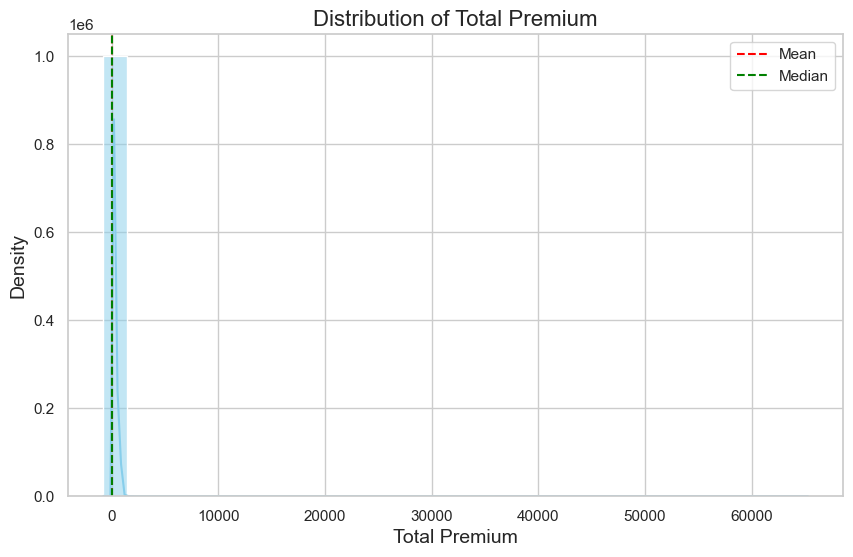

In [63]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Plot a distribution of a numerical column (replace 'TotalPremium' with your column)
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Premium', fontsize=16)
plt.xlabel('Total Premium', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.axvline(df['TotalPremium'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['TotalPremium'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

Numeric columns for correlation: Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'SumInsured',
       'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims',
       'Bank_missing', 'AccountType_missing'],
      dtype='object')


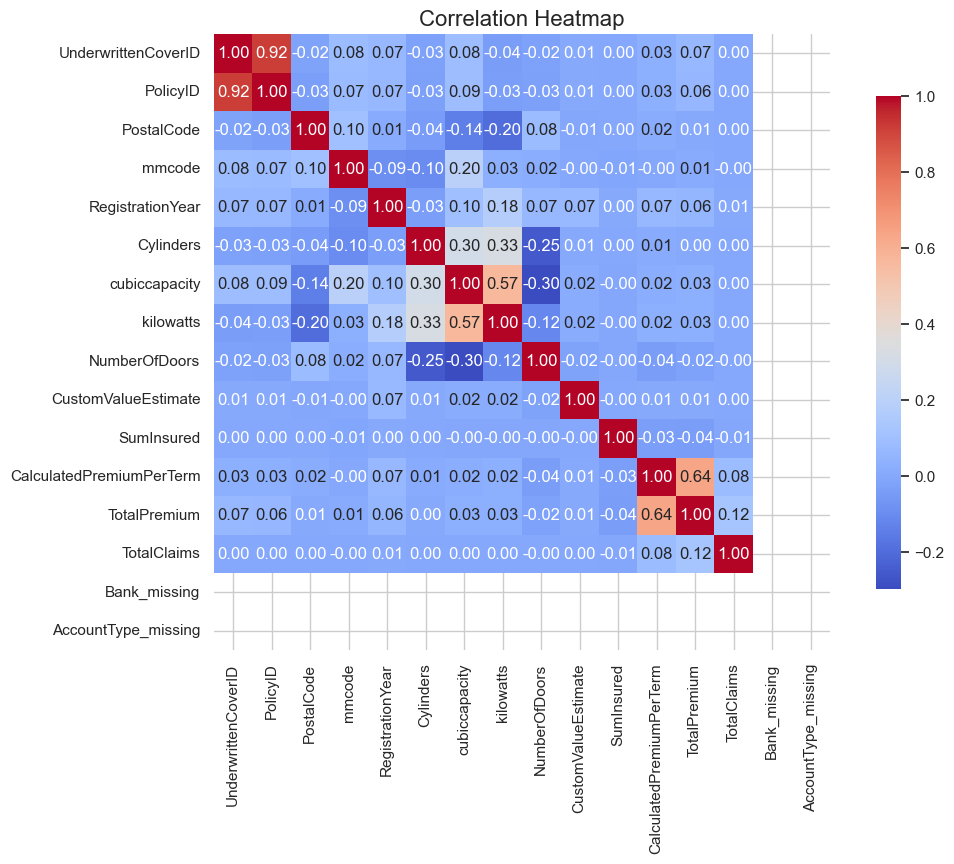

In [66]:
# Alternatively, drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Check the columns that will be used for correlation
print("Numeric columns for correlation:", numeric_df.columns)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

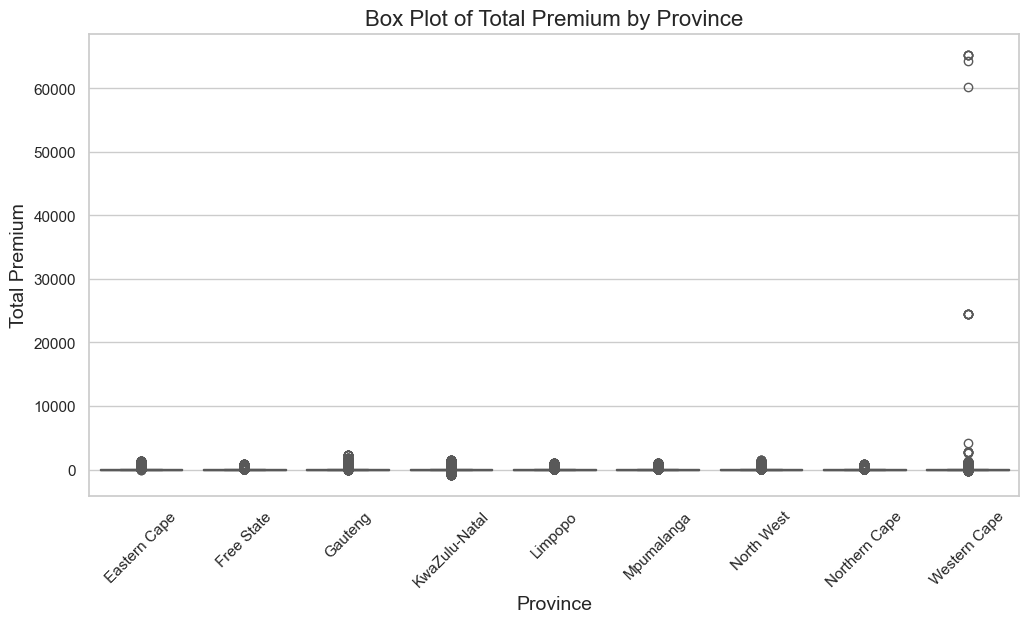

In [ ]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Create a box plot to compare TotalPremium by Province
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Province', y='TotalPremium', hue='Province', palette='Set2', legend=False)
plt.title('Box Plot of Total Premium by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Total Premium', fontsize=14)
plt.xticks(rotation=45)
plt.show()

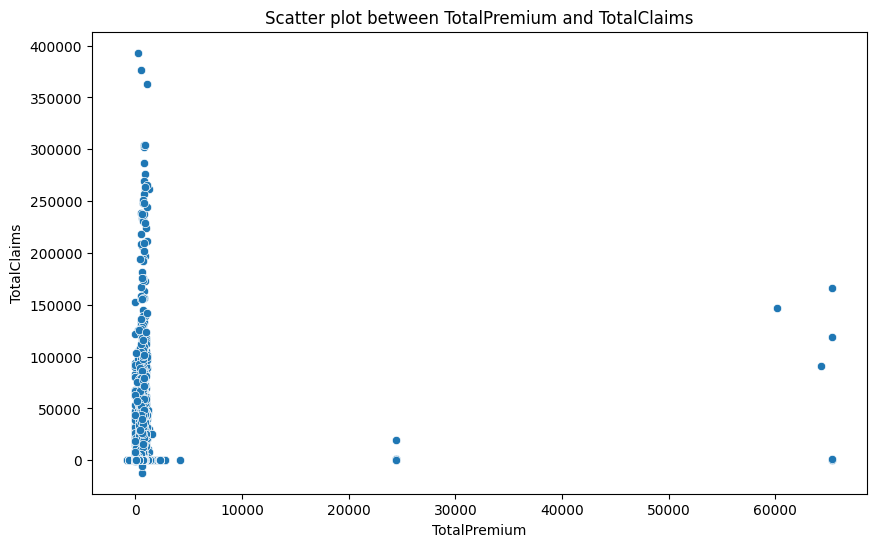

In [32]:

da.plot_scatter(df, 'TotalPremium', 'TotalClaims')